In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('placement.csv') # Load the dataset into a DataFrame

FileNotFoundError: [Errno 2] No such file or directory: 'placement.csv'

In [ ]:
df.head()  # Display the first few rows of the DataFrame

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df = df.iloc[:, 1:]  # Display all columns except the first one

In [ ]:
df.info()  # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.shape  # Display the shape of the DataFrame

(100, 3)

In [ ]:
import matplotlib.pyplot as plt


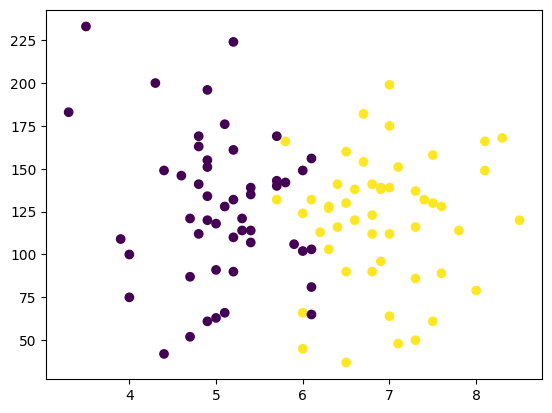

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [ ]:
X = df.iloc[:, 0:2]  # Select the first two columns as features
Y = df.iloc[:, -1]  # Select the last column as the target variable

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
X_train

,cgpa,iq
31,3.9,109.0
47,5.2,161.0
9,5.1,66.0
87,5.7,132.0
7,5.0,63.0
...,...,...
62,6.0,102.0
53,8.3,168.0
27,6.0,124.0
50,3.5,233.0


In [ ]:
Y_train

31    0
47    0
9     0
87    1
7     0
     ..
62    0
53    1
27    1
50    0
15    0
Name: placement, Length: 90, dtype: int64

In [ ]:
X_test

,cgpa,iq
61,7.3,137.0
77,7.3,50.0
97,6.7,182.0
80,4.9,196.0
33,6.0,149.0
64,7.0,64.0
43,6.8,141.0
11,6.9,138.0
82,6.5,37.0
19,5.2,132.0


In [ ]:
Y_test

61    1
77    1
97    1
80    0
33    0
64    1
43    1
11    1
82    1
19    0
Name: placement, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)  # Fit the scaler to the training data and transform it

In [ ]:
X_train

array([[-1.76035484, -0.38438003],
       [-0.63794876,  0.97636017],
       [-0.72428769, -1.5096075 ],
       [-0.20625411,  0.21748583],
       [-0.81062662, -1.58811175],
       [ 1.43418555,  0.1128135 ],
       [-0.89696555, -1.64044791],
       [ 0.13910161, -1.11708629],
       [ 1.34784662, -1.64044791],
       [ 0.31177947,  0.1128135 ],
       [-0.20625411,  0.50533471],
       [ 0.57079626, -0.09653114],
       [ 0.13910161, -1.53577558],
       [ 1.43418555, -0.90774165],
       [ 0.48445733,  0.16514967],
       [-1.41499912,  1.99691532],
       [ 0.48445733,  0.95019209],
       [ 0.22544054, -0.27970771],
       [-0.11991518,  0.47916663],
       [-0.81062662, -0.85540548],
       [-1.06964341, -0.07036306],
       [-0.89696555, -0.09653114],
       [ 0.3981184 ,  0.45299855],
       [ 1.17516876, -0.20120347],
       [ 0.74347412, -0.88157356],
       [-0.4652709 ,  0.29599007],
       [ 0.05276268, -2.0591372 ],
       [ 1.34784662,  0.16514967],
       [ 0.13910161,

In [ ]:
X_test = scaler.transform(X_test)  # Transform the test data using the fitted scaler

In [ ]:
X_test

array([[ 1.17516876,  0.34832623],
       [ 1.17516876, -1.92829679],
       [ 0.65713519,  1.52588986],
       [-0.89696555,  1.89224299],
       [ 0.05276268,  0.6623432 ],
       [ 0.91615197, -1.56194366],
       [ 0.74347412,  0.45299855],
       [ 0.82981305,  0.37449431],
       [ 0.48445733, -2.26848184],
       [-0.63794876,  0.21748583]])

In [ ]:
from sklearn.linear_model import LogisticRegression # Corrected the class name to LogisticRegression

In [ ]:
clf = LogisticRegression()  # Initialize the Logistic Regression model

In [ ]:
# Model training
clf.fit(X_train, Y_train)  # Fit the model to the training data

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
Y_pred = clf.predict(X_test)  # Make predictions on the test data

In [ ]:
Y_test

61    1
77    1
97    1
80    0
33    0
64    1
43    1
11    1
82    1
19    0
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test, Y_pred)  # Calculate the accuracy of the model predictions

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

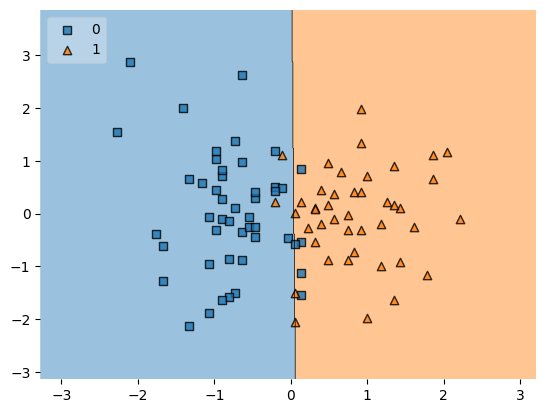

In [ ]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))  # Save the trained model to a file